In [14]:
import os
os.getenv("LD_LIBRARY_PATH")

'/home/annazan/miniconda3/envs/fair38/lib/python3.8/site-packages/cv2/../../lib64::/home/annazan/miniconda3/envs/fair38/lib/'

In [15]:
!echo $LD_LIBRARY_PATH
!source ~/.bashrc
!echo $LD_LIBRARY_PATH


/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/annazan/miniconda3/envs/fair38/lib/python3.8/site-packages/cv2/../../lib64::/home/annazan/miniconda3/envs/fair38/lib/
/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/annazan/miniconda3/envs/fair38/lib/python3.8/site-packages/cv2/../../lib64::/home/annazan/miniconda3/envs/fair38/lib/


In [16]:

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [17]:
import os
import sys
print(os.getcwd())
os.environ.update(os.environ)
        # Add a new environment variable to the operating system
os.environ["RAMP_HOME"] = os.getcwd()
# Print the environment variables to verify that the new variable was added
print(os.environ["RAMP_HOME"])
sys.path.append('../')
sys.path.append('../ramp-code/')
sys.path.append('ramp-code')


/home/annazan/fAIr-utilities
/home/annazan/fAIr-utilities


In [18]:
import cv2

In [19]:
os.environ["SM_FRAMEWORK"] = "tf.keras"
import ramp.utils
import hot_fair_utilities
# base_path = f"{os.getcwd()}/ramp-data/sample_2"
# base_path = "/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar"
# base_path = f"{os.getcwd()}/ramp-data/test_data/1_Zanzibar"
base_path = f'{os.getcwd()}/ramp-data/metric_data/model51_td364/'

In [ ]:
# from hot_fair_utilities import preprocess
# model_input_image_path = f"{base_path}/input"
# preprocess_output=f"{base_path}/preprocessed"
# preprocess(
#             input_path = model_input_image_path,
#             output_path = preprocess_output,
#             rasterize=True,
#             rasterize_options=["binary"],
#             georeference_images=True,
#         )

In [20]:
from hot_fair_utilities import train

In [21]:
preprocess_output=f"{base_path}"

variables are /home/annazan/fAIr-utilities/ramp-data/metric_data/model51_td364/
 and /home/annazan/fAIr-utilities/ramp-data/metric_data/model51_td364/train
Starting to prepare data for training
ramp home is /home/annazan/fAIr-utilities
python home is None
variables are: src /home/annazan/fAIr-utilities/ramp-data/metric_data/model51_td364/
 and dst:/home/annazan/fAIr-utilities/ramp-data/metric_data/model51_td364/train


Writing /home/annazan/fAIr-utilities/ramp-data/metric_data/model51_td364/train/fair_split_train.csv
Writing /home/annazan/fAIr-utilities/ramp-data/metric_data/model51_td364/train/fair_split_val.csv


done split
Data is ready for training
Metric constructor function: get_sparse_categorical_accuracy_fn
Model: importing saved model /home/annazan/fAIr-utilities/ramp-code/ramp/checkpoint.tf
-------
-------[<keras.metrics.metrics.SparseCategoricalAccuracy object at 0x7f2f1a655ee0>]
-------
-------[<keras.metrics.metrics.SparseCategoricalAccuracy object at 0x7f2f1a655ee0>]
-------
-------
* train img dir/home/annazan/fAIr-utilities/ramp-data/metric_data/model51_td364/train/chips
* train mask dir/home/annazan/fAIr-utilities/ramp-data/metric_data/model51_td364/train/binarymasks
* input img shape[256, 256]
* output img shape[256, 256]
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.uint8, name=None))>
-------
* val img dir/home/annazan/fAIr-utilities/ramp-data/metric_data/model51_td364/train/val-chips
* val mask dir/home/annazan/fAIr-utilities/ramp-data/metric_data/model51_td364/train/val-binary

/home/annazan/miniconda3/envs/fair38/lib/python3.8/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


170/170 [==============================] - 46s 208ms/step - loss: 0.2281 - sparse_categorical_accuracy: 0.9354 - val_loss: 0.1251 - val_sparse_categorical_accuracy: 0.9585
Epoch 2/2
170/170 [==============================] - 33s 197ms/step - loss: 0.1269 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.0883 - val_sparse_categorical_accuracy: 0.9672
Training Finished , Time taken to train : 79.55766922399926 seconds

-----
History:
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

-----
Generating graphs ....
Graph generated at : /home/annazan/fAIr-utilities/ramp-data/metric_data/model51_td364/train/graphs
accuracy [0.9353585839271545, 0.9617058038711548]
accuracy [0.9585403203964233, 0.9671859741210938]
loss [0.22813455760478973, 0.12689290940761566]
extracting highest accuracy model
/home/annazan/fAIr-utilities/ramp-data/metric_data/model51_td364/train/model-checkpts/20240222-180025
model_20240222-180025_002_0.967.tf


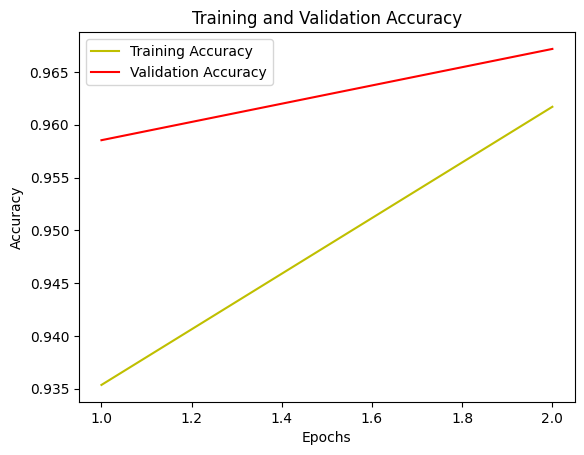

In [22]:
train_output = f"{base_path}train"
final_accuracy, final_model_path = train(
    input_path=preprocess_output,
    output_path=train_output,
    epoch_size=2,
    batch_size=2,
    model="ramp",
    model_home=os.environ["RAMP_HOME"]
)

[here a tf file is created (weights + structure)]

In [ ]:
print(final_accuracy,final_model_path)

In [ ]:
prediction_output = f"{os.getcwd()}/outputs/model51_td364/prediction"

In [ ]:


from hot_fair_utilities import predict


print(f"\n**\n** prediction output {prediction_output}")
print(f"\n**\n** prediction input {base_path}prediction/input")
predict(
    checkpoint_path=final_model_path,
    input_path=f"{base_path}prediction/input",
    prediction_path=prediction_output,
)

In [ ]:
from hot_fair_utilities import polygonize
geojson_output= f"{prediction_output}/prediction.geojson"
polygonize(
    input_path=prediction_output, 
    output_path=geojson_output,
    remove_inputs = True,
)